In [1]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import cv2

import utils
import viz


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [13]:
# load the image
pil_image = Image.open('../test/img1.jpg')

# resize it
new_size = pil_image.size
new_size = [int(x*0.25) for x in new_size]
resized_image = pil_image.resize(new_size, resample=Image.LANCZOS)
img = np.asarray(resized_image)

<IPython.core.display.Javascript object>


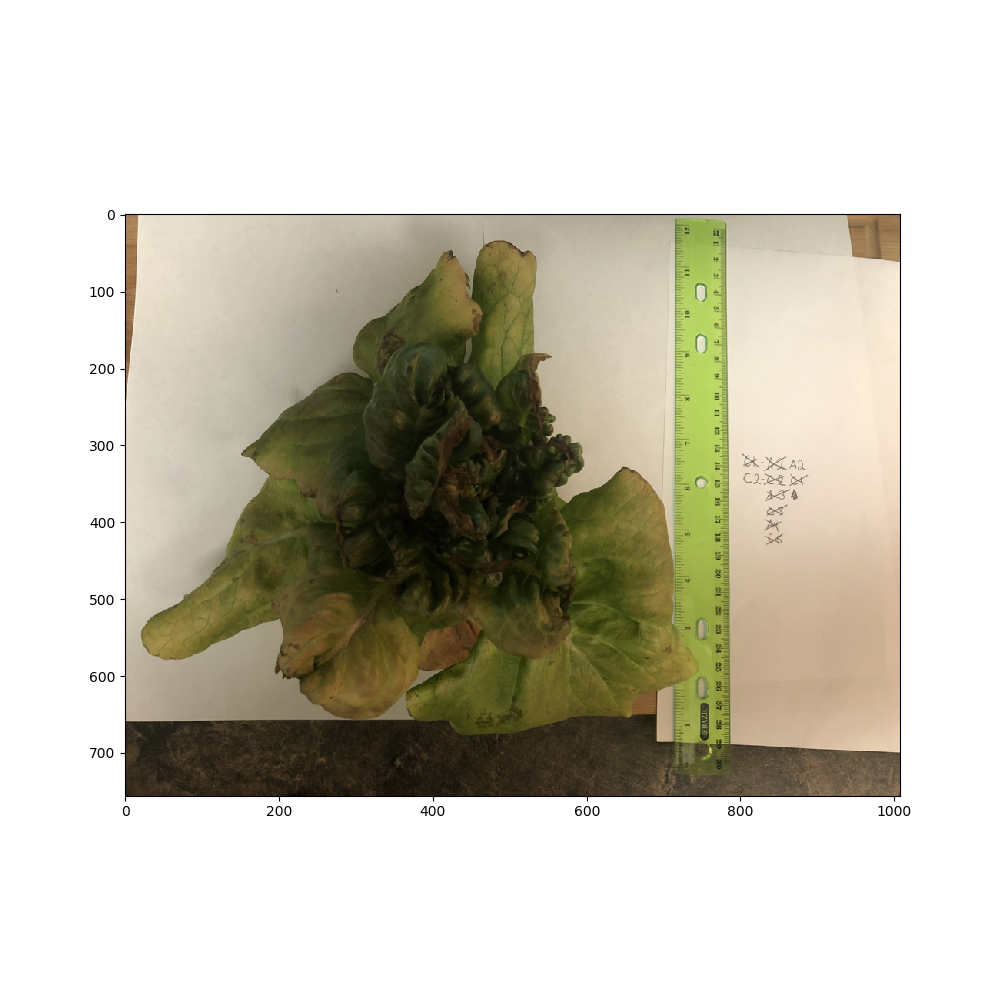

In [14]:

fig = plt.figure(figsize=(10,10)); 
ax = fig.add_subplot(111); 
ax.imshow(img)
plt.show()

# Detect the scale

**Note** User input required

Note down the coordinates (x,y) of 2 points so that they are 1 cm apart on the ruler.

You can zoom in as required using the square botton, and reset the view with the home button

In [15]:
#########################
# TODO: manual input
x1, y1 = 359.27, 784.72
x2, y2 = 382.127, 784.72
#########################

In [16]:
# compute the pixel distance corresponding to 1 cm
pixel_dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
pixel_area_cmsq = pixel_dist**2

print('The pixel area corresponding to 1 sq. cm = ', pixel_area_cmsq)

The pixel area corresponding to 1 sq. cm =  522.4424490000013


# Segment the plant

In [17]:
mask = utils.generate_plant_mask_new(img)
#print(mask.shape)
#imgray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [18]:
segmented_img = viz.visualize_segmented_mask(img, mask)

In [19]:
# segment out plant area
plant_mask = utils.segment_plant_area(img, mask)
plant_mask_image = viz.visualize_segmented_mask(img, plant_mask)

<IPython.core.display.Javascript object>


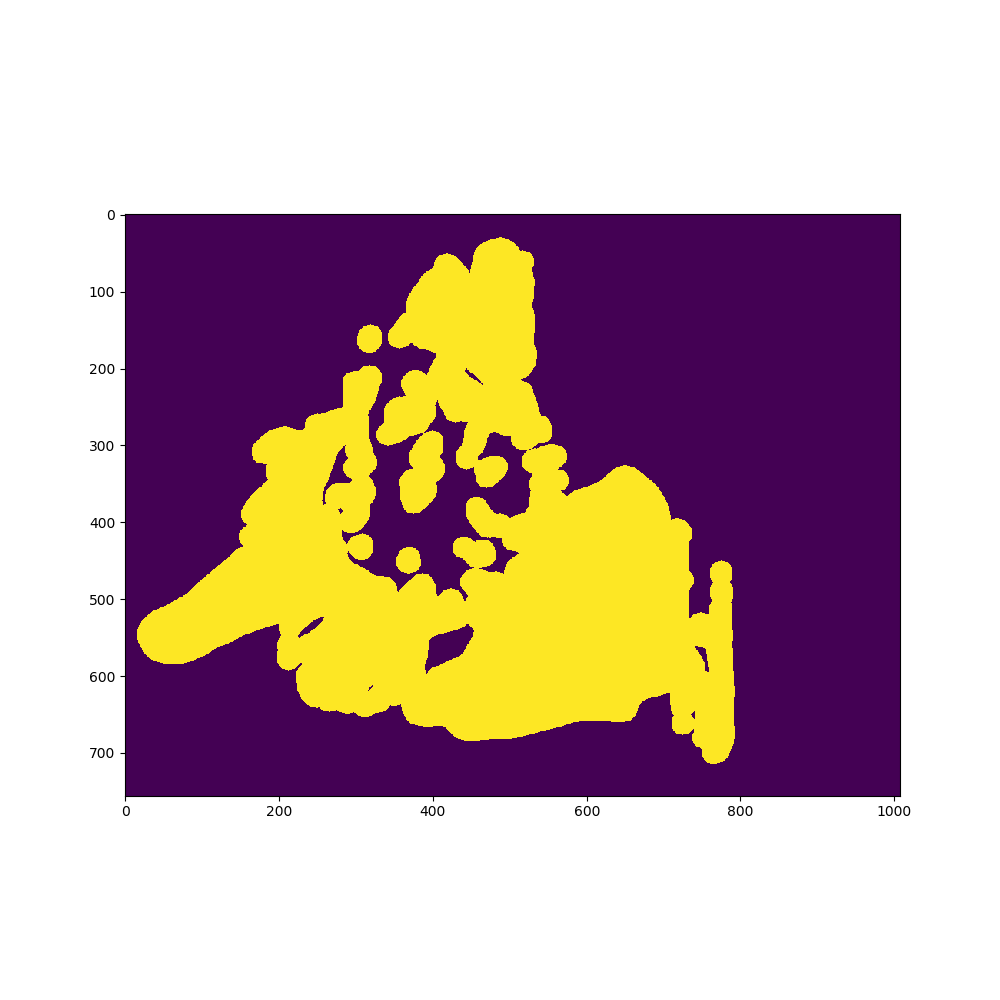

In [20]:
# find and draw contours
_, contours, hier = cv2.findContours(plant_mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
img_cont = np.zeros_like(img)
cv2.drawContours(img_cont, contours, -1, (0,255,0), 3)

plt.figure(figsize=(10,10))
plt.imshow(plant_mask)
plt.show()

In [ ]:
# create hull array for convex hull points
hull = []

# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

In [ ]:
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    cv2.drawContours(img_cont, hull, i, color, 1, 8)
plt.figure(figsize=(10,10))
plt.imshow(img_cont)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(segmented_img)
plt.show()

<IPython.core.display.Javascript object>


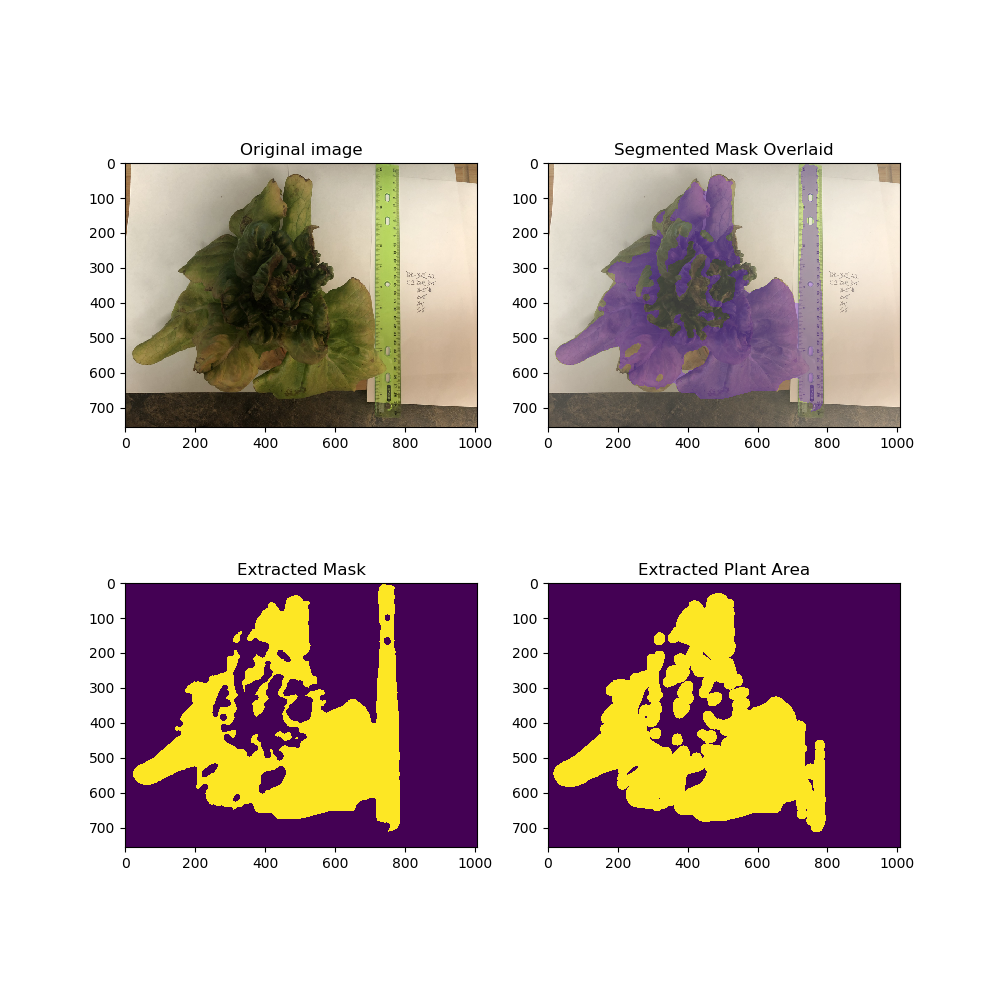

In [21]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.set_title('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(222)
ax2.set_title('Segmented Mask Overlaid')
ax2.imshow(segmented_img)
ax3 = fig.add_subplot(223)
ax3.set_title('Extracted Mask')
ax3.imshow(mask)
ax4 = fig.add_subplot(224)
ax4.set_title('Extracted Plant Area')
ax4.imshow(plant_mask)
plt.show()

In [11]:
# Compute the plant area
plant_pixel_area = float(np.sum(plant_mask, axis=None).item())
plant_scaled_area = plant_pixel_area/pixel_area_cmsq

In [12]:
print('Area of plant in pixels: {:.2f}'.format(plant_pixel_area))
print('Area of plant in sq cm: {:.2f}'.format(plant_scaled_area))

Area of plant in pixels: 142387.00
Area of plant in sq cm: 272.54


In [ ]:
# temp = np.zeros(mask.shape, dtype=np.uint8)
# temp[mask] = 255

# id_objs, obj_heirarchy = utils.get_plant_object(img, temp)

In [ ]:
# colors = [
#     (180, 119, 31),
#     (4, 255, 127),
#     (44, 160, 44),
#     (40, 39, 214),
#     (189, 103, 148),
#     (75, 86, 140),
#     (194, 119, 227),
#     (34, 189, 188),
#     (207, 190, 23)
# ]

In [ ]:
# # draw the detected objects
# det_image = img.copy()
# for i, cnt in enumerate(id_objs):
#     cv2.drawContours(det_image, id_objs, i, colors[i%len(colors)], -1, lineType=8, hierarchy=obj_heirarchy)

In [ ]:
# plt.figure()
# plt.imshow(det_image)